In [1]:
import pandas as pd

df_ba = pd.read_csv('../data/combined/backwheel_acc.csv', low_memory=False)
df_bg = pd.read_csv('../data/combined/backwheel_gyro.csv', low_memory=False)
df_ha = pd.read_csv('../data/combined/handlebar_acc.csv', low_memory=False)
df_hg = pd.read_csv('../data/combined/handlebar_gyro.csv', low_memory=False)

df_ba.head()

,NTP,Acc-X,Acc-Y,Acc-Z,Roughness_Label,Curb_Label
0,2024-05-28 15:21:46.832,6.072984,6.911369,3.081956,roughness_medium,NaN
1,2024-05-28 15:21:46.834,6.077769,6.892227,3.050849,NaN,NaN
2,2024-05-28 15:21:46.838,6.118447,6.908976,3.017349,NaN,NaN
3,2024-05-28 15:21:46.839,6.163911,6.906583,3.017349,NaN,NaN
4,2024-05-28 15:21:46.842,6.214160,6.904191,3.026921,NaN,NaN


In [2]:
df_bg.head()

,NTP,Gyr-X,Gyr-Y,Gyr-Z,Roughness_Label,Curb_Label
0,2024-05-28 15:21:46.832,0.014355,-0.006414,-0.000458,roughness_medium,NaN
1,2024-05-28 15:21:46.835,0.010690,-0.016187,-0.001680,NaN,NaN
2,2024-05-28 15:21:46.838,0.007025,-0.023518,-0.001680,NaN,NaN
3,2024-05-28 15:21:46.839,0.004581,-0.029626,-0.001680,NaN,NaN
4,2024-05-28 15:21:46.842,0.002138,-0.036956,-0.001680,NaN,NaN


In [3]:
df_ba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254106 entries, 0 to 1254105
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   NTP              1254106 non-null  object 
 1   Acc-X            1254106 non-null  float64
 2   Acc-Y            1254106 non-null  float64
 3   Acc-Z            1254106 non-null  float64
 4   Roughness_Label  222 non-null      object 
 5   Curb_Label       126 non-null      object 
dtypes: float64(3), object(3)
memory usage: 57.4+ MB


In [4]:
df_ba.describe()

,Acc-X,Acc-Y,Acc-Z
count,1.254106e+06,1.254106e+06,1.254106e+06
mean,4.323829e+00,8.245651e+00,2.761801e+00
std,2.364355e+00,2.201370e+00,3.508341e+00
min,-7.501977e+01,-7.839037e+01,-7.849475e+01
25%,2.972783e+00,7.095616e+00,1.358226e+00
50%,3.978068e+00,8.311769e+00,2.772982e+00
75%,5.728118e+00,9.324531e+00,4.257430e+00
max,7.750801e+01,7.843733e+01,7.833324e+01


In [5]:
df_bg.describe()

,Gyr-X,Gyr-Y,Gyr-Z
count,1.254106e+06,1.254106e+06,1.254106e+06
mean,-6.062081e-04,-5.580612e-04,-5.878881e-03
std,4.267930e-01,4.809347e-01,1.602693e-01
min,-1.739830e+01,-1.323278e+01,-1.984505e+01
25%,-1.456871e-01,-2.250972e-01,-8.170082e-02
50%,-3.054236e-04,2.290677e-03,-6.108473e-04
75%,1.450762e-01,2.295259e-01,7.528693e-02
max,1.288277e+01,1.617554e+01,7.422710e+00


In [6]:
df_ha.describe()

,Acc-X,Acc-Y,Acc-Z
count,1.336995e+06,1.336995e+06,1.336995e+06
mean,-6.227138e-01,1.973978e+00,9.623874e+00
std,2.181926e+00,2.629099e+00,5.148415e+00
min,-6.021236e+01,-7.848965e+01,-7.853254e+01
25%,-1.717350e+00,7.765640e-01,7.075647e+00
50%,-6.352168e-01,1.983190e+00,9.625362e+00
75%,4.852213e-01,3.165875e+00,1.212241e+01
max,6.795332e+01,7.835734e+01,7.831445e+01


In [7]:
df_hg.describe()

,Gyr-X,Gyr-Y,Gyr-Z
count,1.336992e+06,1.336992e+06,1.336992e+06
mean,2.200668e-02,-3.116532e-03,-1.074726e-03
std,3.051085e-01,1.505176e-01,5.452234e-01
min,-9.808007e+00,-4.073244e+00,-5.059327e+00
25%,-1.262981e-01,-8.554196e-02,-2.896953e-01
50%,1.297906e-02,-2.441643e-03,-3.810635e-03
75%,1.705821e-01,7.941423e-02,2.866910e-01
max,8.654768e+00,2.965116e+00,5.304604e+00


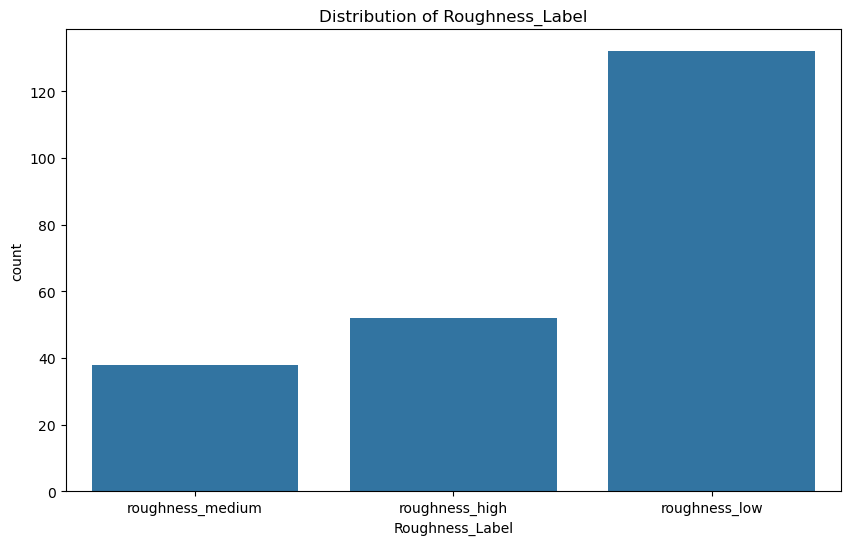

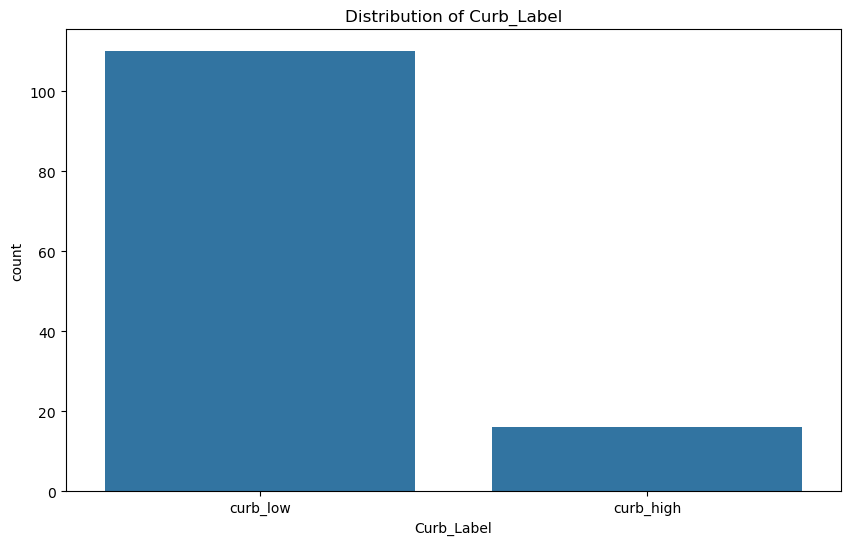

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Roughness_Label', data=df_ba)
plt.title('Distribution of Roughness_Label')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Curb_Label', data=df_ba)
plt.title('Distribution of Curb_Label')
plt.show()

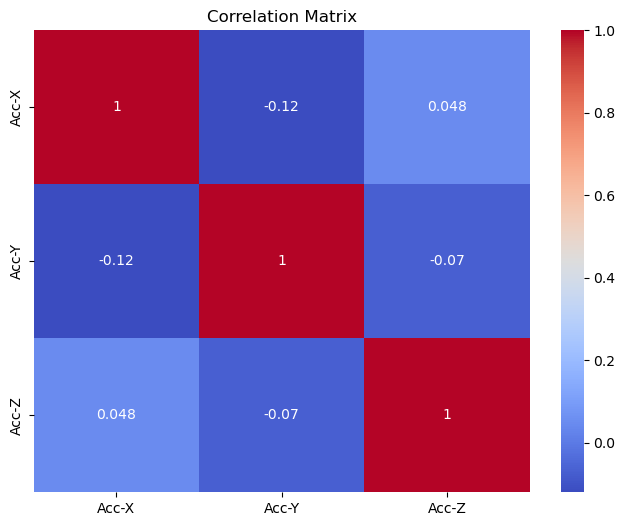

In [10]:
correlation_matrix = df_ba[['Acc-X', 'Acc-Y', 'Acc-Z']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

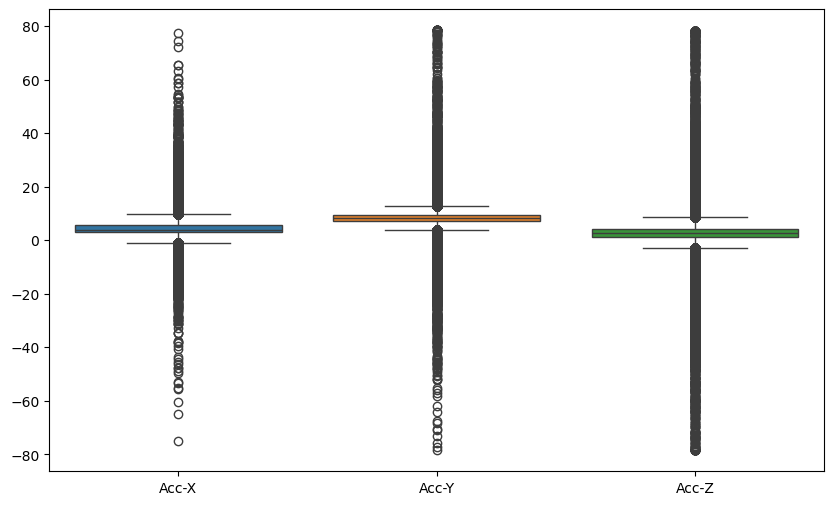

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ba[['Acc-X', 'Acc-Y', 'Acc-Z']])
plt.show()

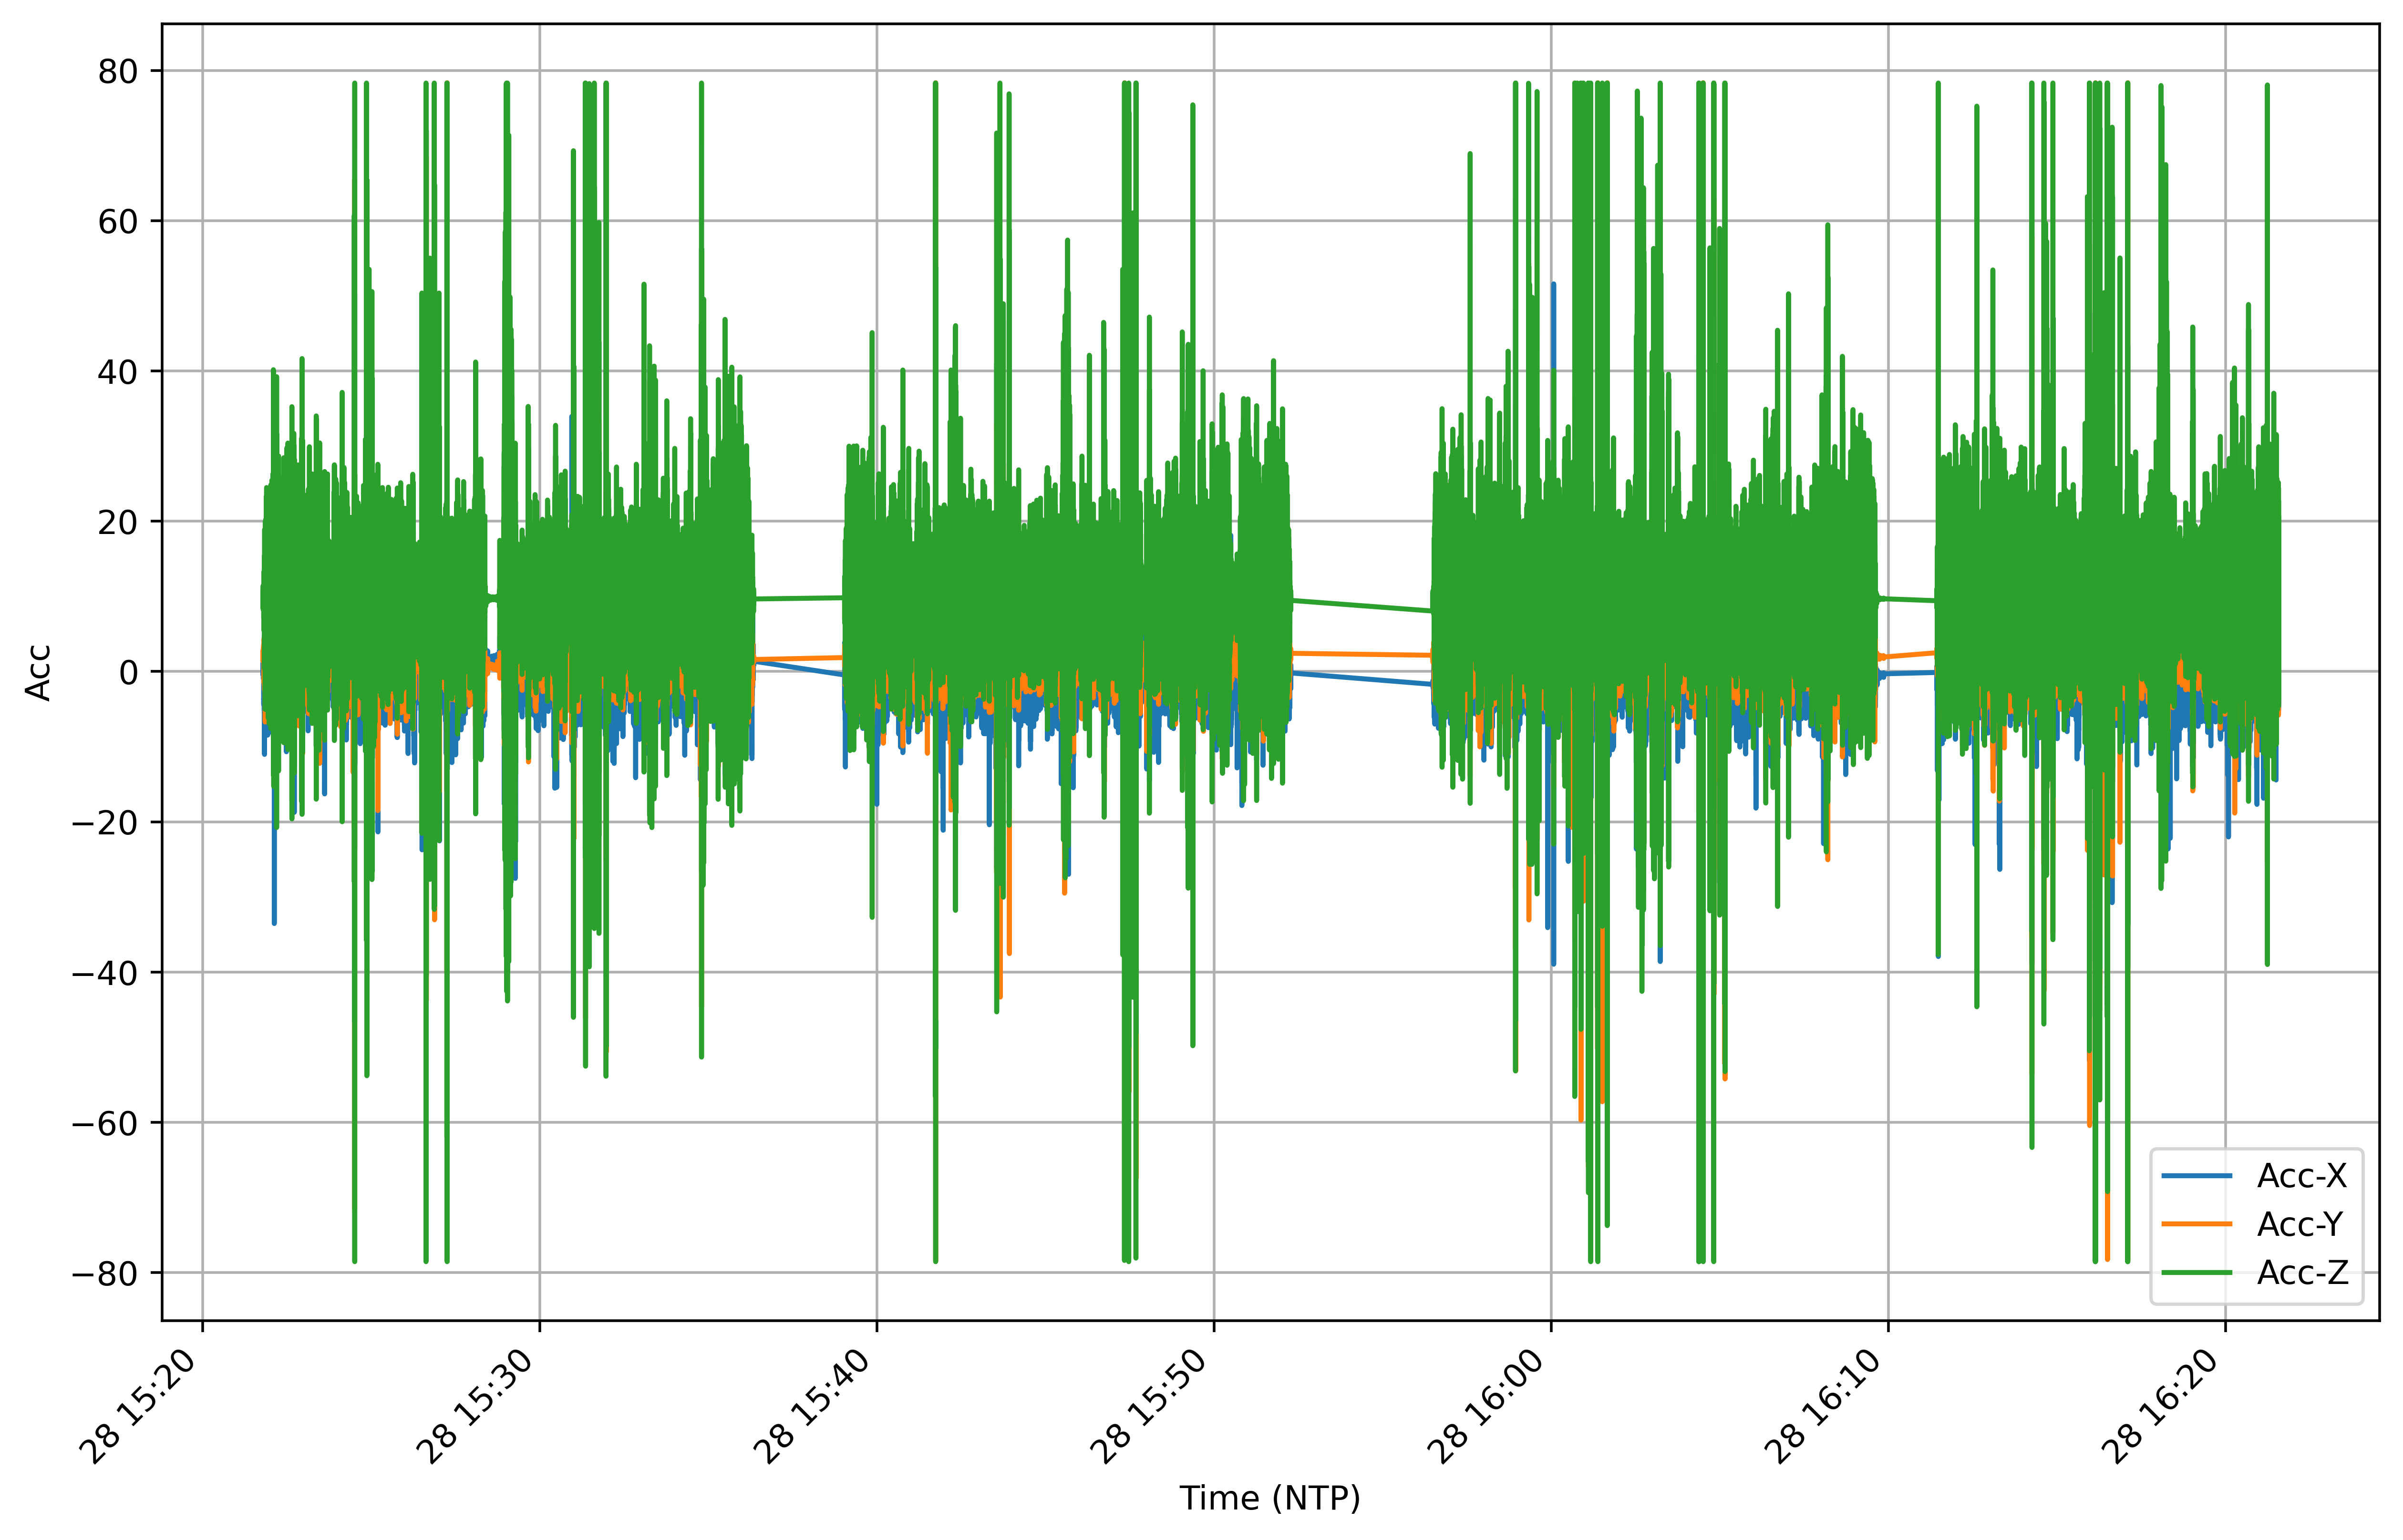

In [12]:
df_ha['NTP'] = pd.to_datetime(df_ha['NTP'])

plt.figure(figsize=(12, 8), dpi=500)
plt.plot(df_ha['NTP'], df_ha['Acc-X'], label='Acc-X')
plt.plot(df_ha['NTP'], df_ha['Acc-Y'], label='Acc-Y')
plt.plot(df_ha['NTP'], df_ha['Acc-Z'], label='Acc-Z')
# plt.plot(df['NTP'], df['Gyr-X'], label='Acc-X')
# plt.plot(df['NTP'], df['Gyr-Y'], label='Acc-Y')
# plt.plot(df['NTP'], df['Gyr-Z'], label='Acc-Z')

plt.xlabel('Time (NTP)')
plt.ylabel('Acc')
plt.legend()
plt.gcf().autofmt_xdate()
plt.xticks(rotation=45)
ax = plt.gca()
plt.grid()
plt.show()

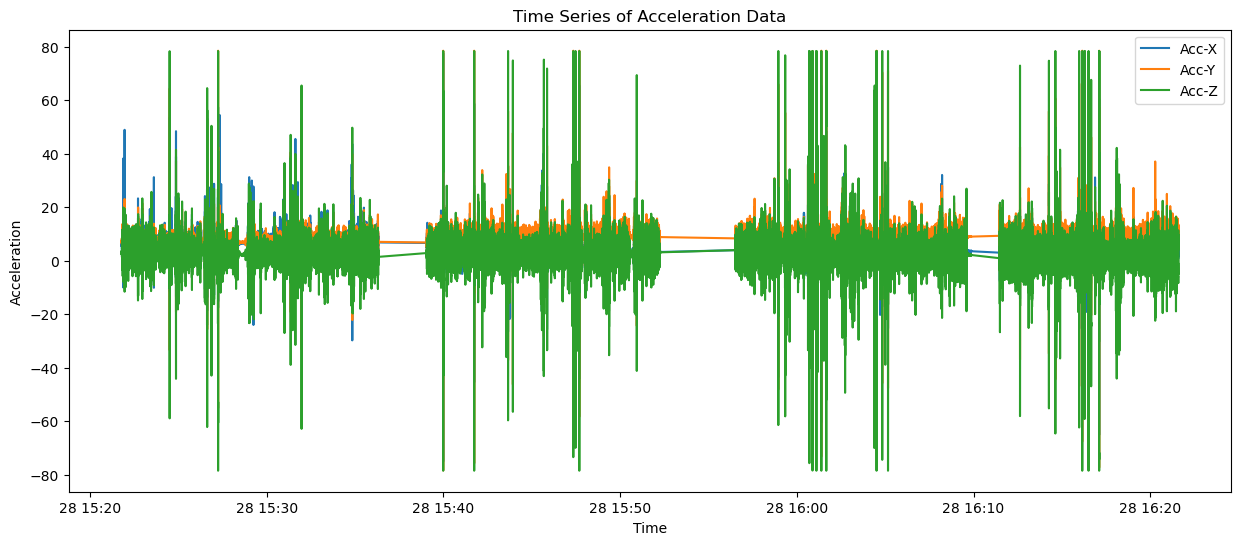

In [13]:
df_ba['NTP'] = pd.to_datetime(df_ba['NTP'])
plt.figure(figsize=(15, 6), dpi=100)
plt.plot(df_ba['NTP'], df_ba['Acc-X'], label='Acc-X')
plt.plot(df_ba['NTP'], df_ba['Acc-Y'], label='Acc-Y')
plt.plot(df_ba['NTP'], df_ba['Acc-Z'], label='Acc-Z')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Time Series of Acceleration Data')
plt.show()

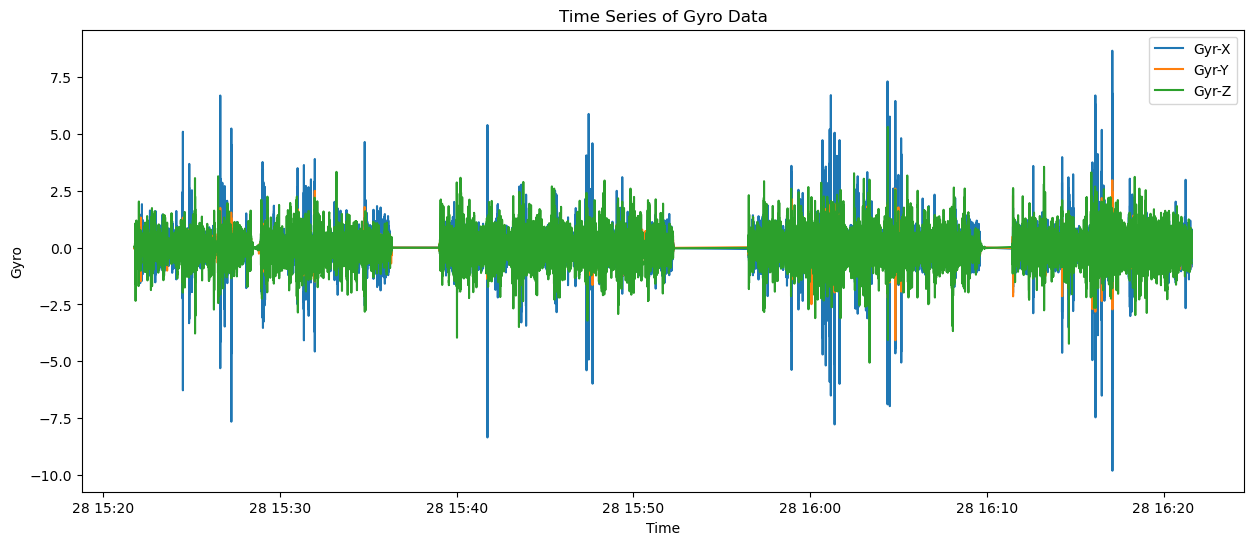

In [14]:
df_hg['NTP'] = pd.to_datetime(df_hg['NTP'])
plt.figure(figsize=(15, 6), dpi=100)
plt.plot(df_hg['NTP'], df_hg['Gyr-X'], label='Gyr-X')
plt.plot(df_hg['NTP'], df_hg['Gyr-Y'], label='Gyr-Y')
plt.plot(df_hg['NTP'], df_hg['Gyr-Z'], label='Gyr-Z')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Gyro')
plt.title('Time Series of Gyro Data')
plt.show()

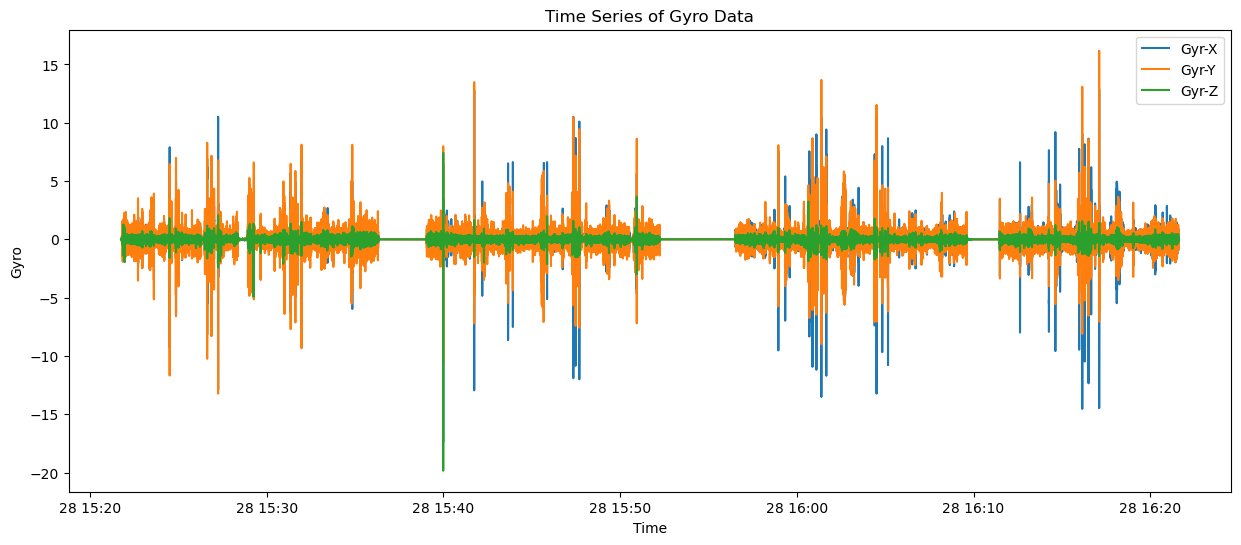

In [15]:
df_bg['NTP'] = pd.to_datetime(df_bg['NTP'])
plt.figure(figsize=(15, 6), dpi=100)
plt.plot(df_bg['NTP'], df_bg['Gyr-X'], label='Gyr-X')
plt.plot(df_bg['NTP'], df_bg['Gyr-Y'], label='Gyr-Y')
plt.plot(df_bg['NTP'], df_bg['Gyr-Z'], label='Gyr-Z')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Gyro')
plt.title('Time Series of Gyro Data')
plt.show()